In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [4]:
df_echonest = pd.read_csv('../DataBase/raw/echonest_features.tsv', sep='\t')
df_spectral = pd.read_csv('../DataBase/raw/spectral_features.tsv', sep='\t')
df_tracks = pd.read_csv('../DataBase/raw/tracks.tsv', sep='\t')
df_genres = pd.read_csv('../DataBase/raw/genres.csv')

In [5]:
print('Echonest shape:', df_echonest.shape)
print('Spectral shape:', df_spectral.shape)
print('Tracks shape:', df_tracks.shape)
print('Genres shape:', df_genres.shape)

Echonest shape: (11440, 9)
Spectral shape: (99995, 22)
Tracks shape: (99995, 14)
Genres shape: (164, 5)


# Merge Datasets

In [6]:
df_tracks.rename(columns={'genre_top': 'genre_title'}, inplace=True)

In [7]:
df = pd.merge(left=df_tracks, right=df_spectral, on='track_id', how='left')
df = pd.merge(left=df, right=df_echonest, on='track_id', how='left')
df = pd.merge(left=df, right=df_genres, on='genre_title', how='left')

In [8]:
print('Merged dataset shape:', df.shape)
df.head()

Merged dataset shape: (99995, 47)


,track_id,album_title,album_tracks,artist_latitude,artist_longitude,artist_name,duration,favorites,genre_title,genres,...,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_id,genre_color,genre_handle,genre_parent_id
0,11870,Wildahead Portibeast,10,NaN,NaN,Wildahead Portibeast,131,0,Hip-Hop,[21],...,0.645929,0.769285,0.195042,0.101240,159.908,0.474554,21.0,#CC0000,Hip-Hop,NaN
1,11871,Wildahead Portibeast,10,NaN,NaN,Wildahead Portibeast,185,0,Hip-Hop,[21],...,0.694364,0.950413,0.269082,0.180927,188.077,0.585049,21.0,#CC0000,Hip-Hop,NaN
2,11872,Wildahead Portibeast,10,NaN,NaN,Wildahead Portibeast,183,0,Hip-Hop,[21],...,0.608690,0.725811,0.125451,0.623711,137.676,0.522381,21.0,#CC0000,Hip-Hop,NaN
3,11873,Wildahead Portibeast,10,NaN,NaN,Wildahead Portibeast,213,3,Hip-Hop,[21],...,0.743163,0.786033,0.214622,0.142762,79.371,0.644394,21.0,#CC0000,Hip-Hop,NaN
4,11874,Wildahead Portibeast,10,NaN,NaN,Wildahead Portibeast,162,0,Hip-Hop,[21],...,0.588584,0.861204,0.120561,0.187306,190.518,0.537996,21.0,#CC0000,Hip-Hop,NaN


# Data Overview

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99995 entries, 0 to 99994
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   track_id                        99995 non-null  int64  
 1   album_title                     99084 non-null  object 
 2   album_tracks                    99995 non-null  int64  
 3   artist_latitude                 40207 non-null  float64
 4   artist_longitude                40207 non-null  float64
 5   artist_name                     99995 non-null  object 
 6   duration                        99995 non-null  int64  
 7   favorites                       99995 non-null  int64  
 8   genre_title                     44633 non-null  object 
 9   genres                          99995 non-null  object 
 10  genres_all                      99995 non-null  object 
 11  interest                        99995 non-null  int64  
 12  listens                         

In [10]:
df.describe()

,track_id,album_tracks,artist_latitude,artist_longitude,duration,favorites,interest,listens,spectral_bandwidth_kurtosis_01,spectral_bandwidth_max_01,...,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_id,genre_parent_id
count,99995.000000,99995.000000,40207.000000,40207.000000,99995.000000,99995.000000,9.999500e+04,99995.000000,99995.000000,99995.000000,...,1.055300e+04,10534.000000,10553.000000,10553.000000,10553.000000,10408.000000,10553.000000,10532.000000,44633.000000,785.000000
mean,84272.568048,19.908645,39.967832,-35.443236,278.034522,3.239962,3.628631e+03,2403.072944,7.588260,3544.781941,...,4.893790e-01,0.506784,0.541650,0.628853,0.185575,0.098309,122.447143,0.449579,73.441310,14.663694
std,41846.737500,40.510849,18.766913,65.670545,294.940279,13.863871,1.957852e+04,8234.085292,28.517327,384.217742,...,3.847813e-01,0.189812,0.274799,0.366879,0.153461,0.133848,34.926595,0.276176,252.017871,5.223477
min,11870.000000,-1.000000,-45.874501,-157.526855,0.000000,0.000000,2.000000e+00,0.000000,-1.961655,469.536530,...,9.491000e-07,0.051435,0.000020,0.000000,0.025916,0.022324,0.000000,0.008695,2.000000,3.000000
25%,47880.500000,7.000000,39.271398,-78.868915,151.000000,0.000000,6.020000e+02,305.000000,-0.074174,3361.957397,...,7.092254e-02,0.367335,0.330205,0.265575,0.100226,0.036824,95.749000,0.207454,12.000000,17.000000
50%,83556.000000,11.000000,41.823989,-72.669067,218.000000,1.000000,1.333000e+03,797.000000,1.396075,3555.611572,...,4.866641e-01,0.511994,0.554549,0.832360,0.118605,0.049323,120.024000,0.433179,15.000000,17.000000
75%,121583.500000,18.000000,50.079079,5.007986,307.000000,3.000000,3.117000e+03,2085.000000,5.662101,3703.081299,...,8.976251e-01,0.651299,0.774238,0.915122,0.212983,0.086431,143.958000,0.676777,38.000000,17.000000
max,155320.000000,652.000000,67.286005,175.277000,11030.000000,1482.000000,3.293557e+06,543252.000000,3143.452148,5495.584473,...,9.957965e-01,0.968645,0.999964,0.998016,0.980330,0.966177,251.072000,0.999990,1235.000000,17.000000


# Missing Data Analysis

In [11]:
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'missing_count': missing,
    'missing_pct': missing_pct
})
missing_df = missing_df[missing_df['missing_count'] > 0].sort_values('missing_pct', ascending=False)
missing_df

,missing_count,missing_pct
genre_parent_id,99210,99.214961
speechiness,89587,89.591480
valence,89463,89.467473
danceability,89461,89.465473
energy,89442,89.446472
tempo,89442,89.446472
liveness,89442,89.446472
instrumentalness,89442,89.446472
acousticness,89442,89.446472
artist_latitude,59788,59.790990


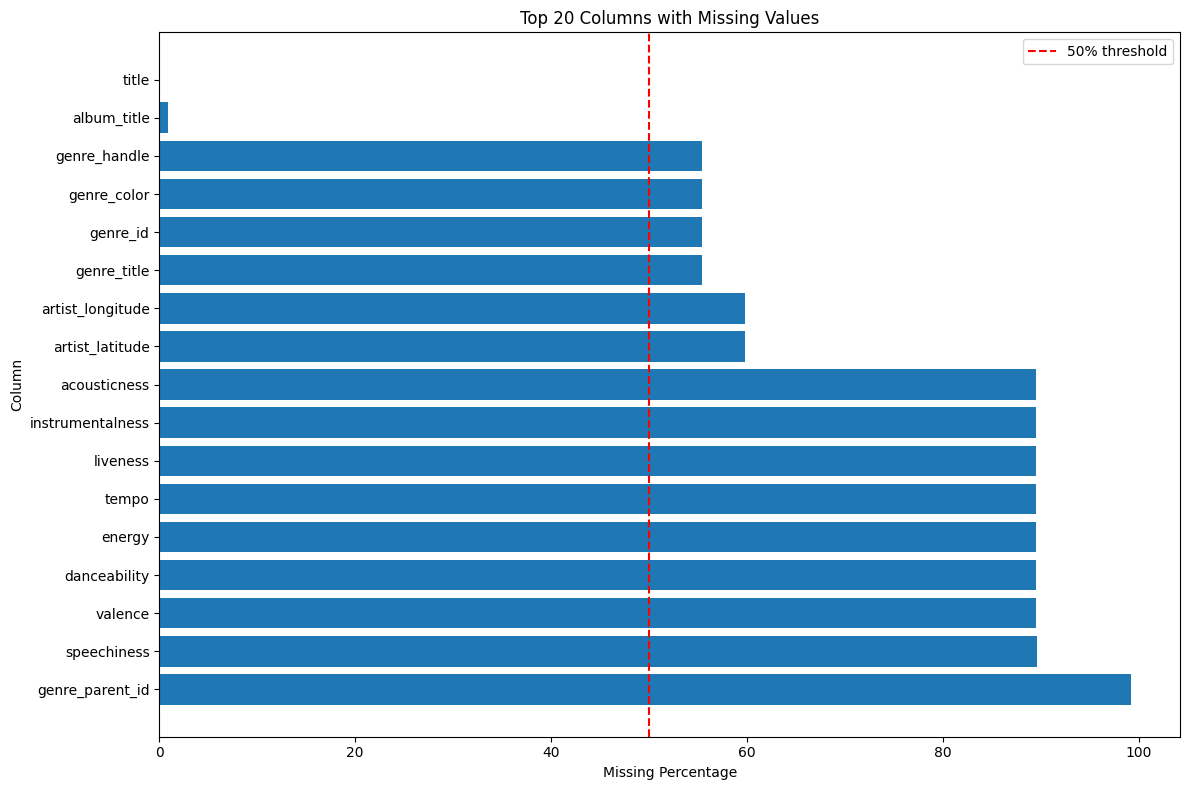

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))
top_missing = missing_df.head(20)
ax.barh(top_missing.index, top_missing['missing_pct'])
ax.set_xlabel('Missing Percentage')
ax.set_ylabel('Column')
ax.set_title('Top 20 Columns with Missing Values')
ax.axvline(x=50, color='red', linestyle='--', label='50% threshold')
ax.legend()
plt.tight_layout()
plt.show()

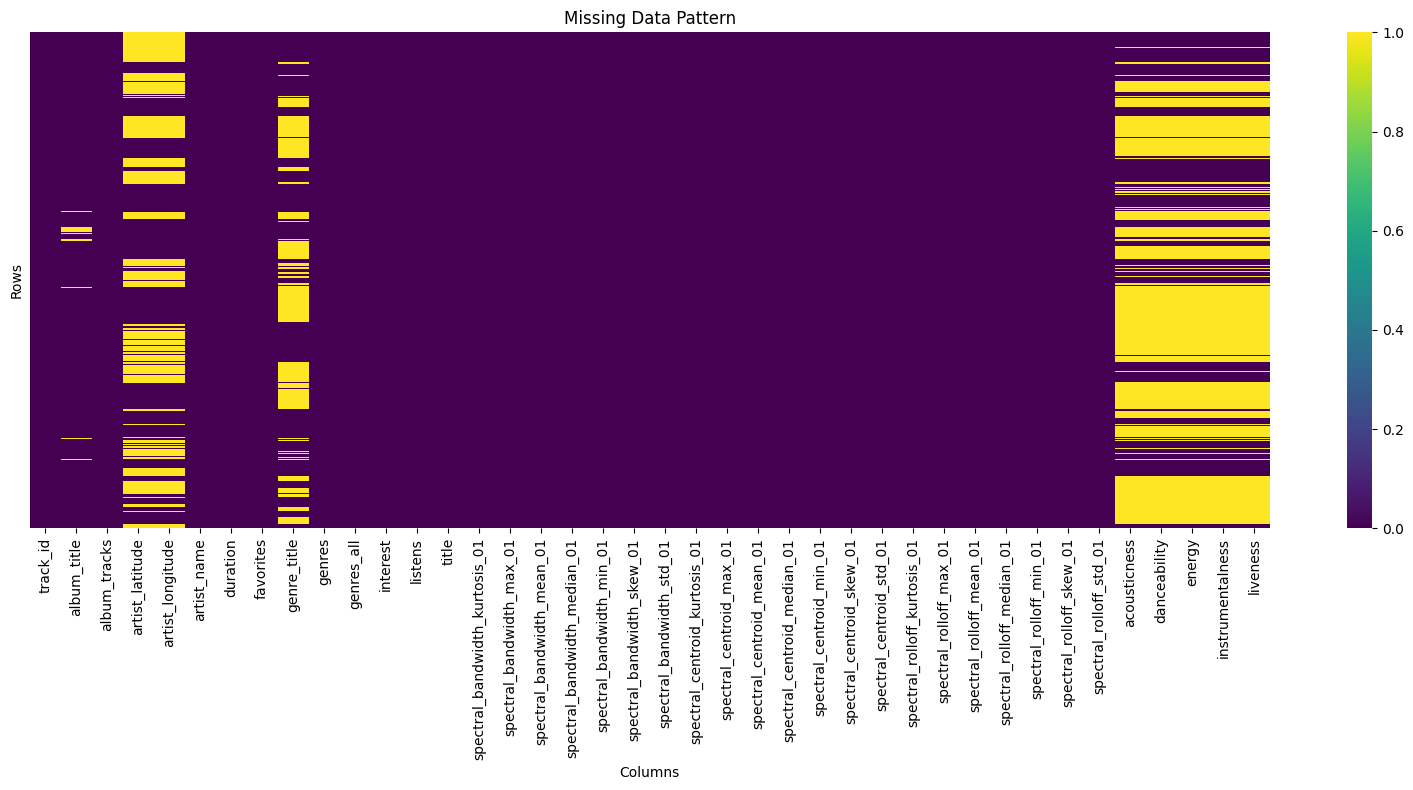

In [15]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(df.isnull().iloc[:500, :40], cbar=True, yticklabels=False, cmap='viridis', ax=ax)
ax.set_title('Missing Data Pattern')
ax.set_xlabel('Columns')
ax.set_ylabel('Rows')
plt.tight_layout()
plt.show()

# Duplicates Check

In [17]:
print('Total duplicates:', df.duplicated().sum())
print('Duplicate track_id:', df.duplicated(subset=['track_id']).sum())

Total duplicates: 0
Duplicate track_id: 0


# Genre Distribution

In [18]:
genre_counts = df['genre_title'].value_counts()
print('Total genres:', len(genre_counts))
print('\nGenre distribution:')
genre_counts

Total genres: 16

Genre distribution:


genre_title
Rock                   12085
Experimental            9752
Electronic              8769
Hip-Hop                 3334
Folk                    2375
Pop                     2235
Instrumental            2003
International           1256
Classical               1129
Old-Time / Historic      491
Jazz                     484
Spoken                   323
Country                  163
Soul-RnB                 131
Blues                     79
Easy Listening            24
Name: count, dtype: int64

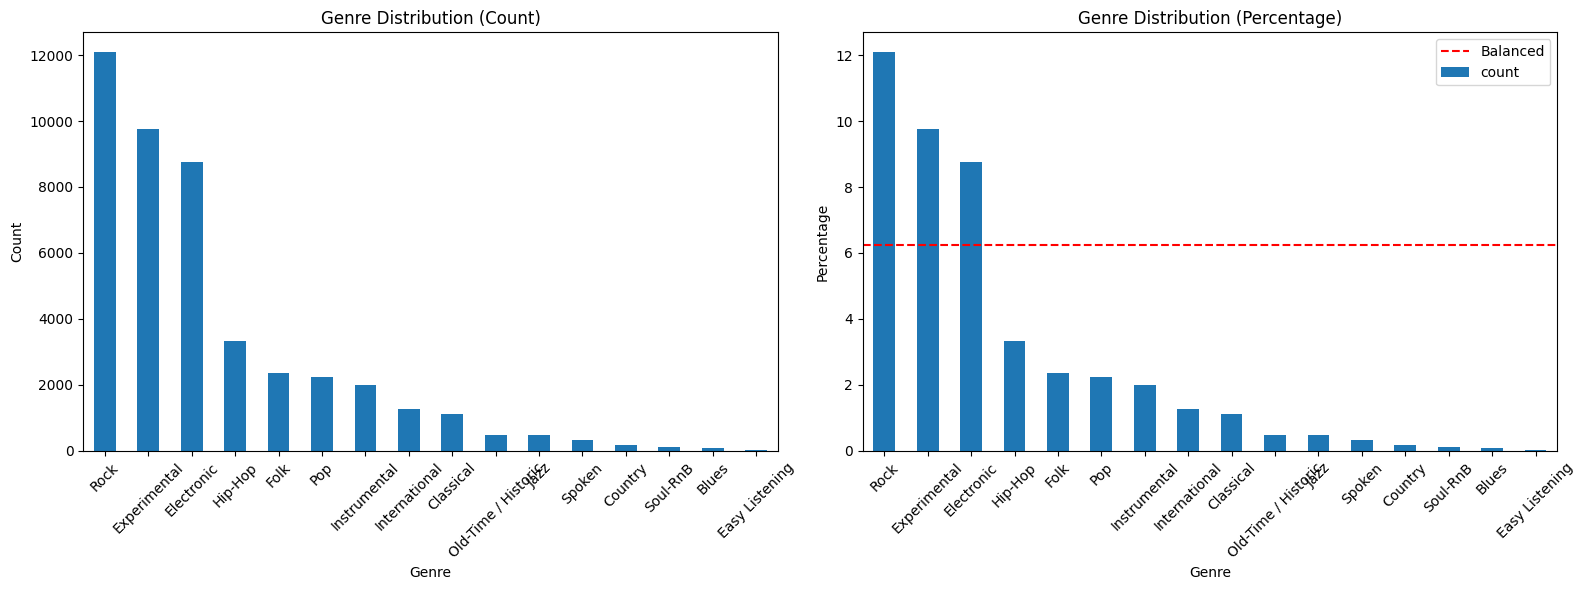

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

genre_counts.plot(kind='bar', ax=axes[0])
axes[0].set_title('Genre Distribution (Count)')
axes[0].set_xlabel('Genre')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

genre_pct = (genre_counts / len(df)) * 100
genre_pct.plot(kind='bar', ax=axes[1])
axes[1].set_title('Genre Distribution (Percentage)')
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('Percentage')
axes[1].tick_params(axis='x', rotation=45)
axes[1].axhline(y=100/len(genre_counts), color='red', linestyle='--', label='Balanced')
axes[1].legend()

plt.tight_layout()
plt.show()

# Duration Analysis

In [20]:
print('Duration statistics:')
print(df['duration'].describe())
print('\nMissing duration:', df['duration'].isnull().sum())

Duration statistics:
count    99995.000000
mean       278.034522
std        294.940279
min          0.000000
25%        151.000000
50%        218.000000
75%        307.000000
max      11030.000000
Name: duration, dtype: float64

Missing duration: 0


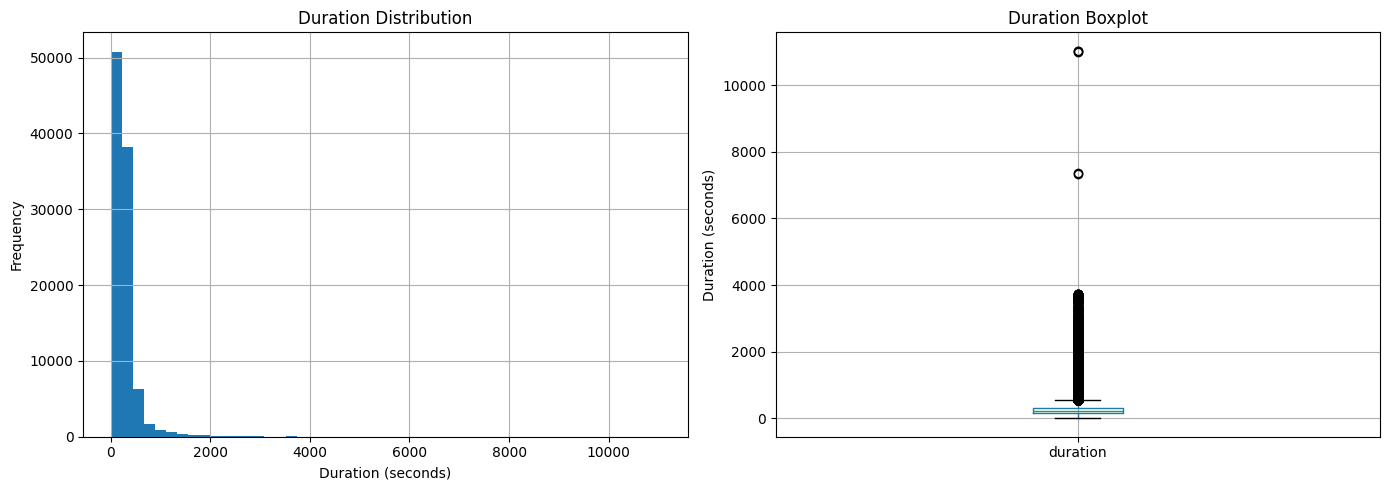

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df['duration'].dropna().hist(bins=50, ax=axes[0])
axes[0].set_title('Duration Distribution')
axes[0].set_xlabel('Duration (seconds)')
axes[0].set_ylabel('Frequency')

df.boxplot(column='duration', ax=axes[1])
axes[1].set_title('Duration Boxplot')
axes[1].set_ylabel('Duration (seconds)')

plt.tight_layout()
plt.show()

# Numeric Features Overview

In [22]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print('Total numeric columns:', len(numeric_cols))
print('\nNumeric columns:', numeric_cols)

Total numeric columns: 39

Numeric columns: ['track_id', 'album_tracks', 'artist_latitude', 'artist_longitude', 'duration', 'favorites', 'interest', 'listens', 'spectral_bandwidth_kurtosis_01', 'spectral_bandwidth_max_01', 'spectral_bandwidth_mean_01', 'spectral_bandwidth_median_01', 'spectral_bandwidth_min_01', 'spectral_bandwidth_skew_01', 'spectral_bandwidth_std_01', 'spectral_centroid_kurtosis_01', 'spectral_centroid_max_01', 'spectral_centroid_mean_01', 'spectral_centroid_median_01', 'spectral_centroid_min_01', 'spectral_centroid_skew_01', 'spectral_centroid_std_01', 'spectral_rolloff_kurtosis_01', 'spectral_rolloff_max_01', 'spectral_rolloff_mean_01', 'spectral_rolloff_median_01', 'spectral_rolloff_min_01', 'spectral_rolloff_skew_01', 'spectral_rolloff_std_01', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence', 'genre_id', 'genre_parent_id']


In [23]:
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
track_id,99995.0,84272.568048,41846.737500,1.187000e+04,47880.500000,83556.000000,121583.500000,1.553200e+05
album_tracks,99995.0,19.908645,40.510849,-1.000000e+00,7.000000,11.000000,18.000000,6.520000e+02
artist_latitude,40207.0,39.967832,18.766913,-4.587450e+01,39.271398,41.823989,50.079079,6.728601e+01
artist_longitude,40207.0,-35.443236,65.670545,-1.575269e+02,-78.868915,-72.669067,5.007986,1.752770e+02
duration,99995.0,278.034522,294.940279,0.000000e+00,151.000000,218.000000,307.000000,1.103000e+04
favorites,99995.0,3.239962,13.863871,0.000000e+00,0.000000,1.000000,3.000000,1.482000e+03
interest,99995.0,3628.631112,19578.522967,2.000000e+00,602.000000,1333.000000,3117.000000,3.293557e+06
listens,99995.0,2403.072944,8234.085292,0.000000e+00,305.000000,797.000000,2085.000000,5.432520e+05
spectral_bandwidth_kurtosis_01,99995.0,7.588260,28.517327,-1.961655e+00,-0.074174,1.396075,5.662101,3.143452e+03
spectral_bandwidth_max_01,99995.0,3544.781941,384.217742,4.695365e+02,3361.957397,3555.611572,3703.081299,5.495584e+03


# Correlation Analysis

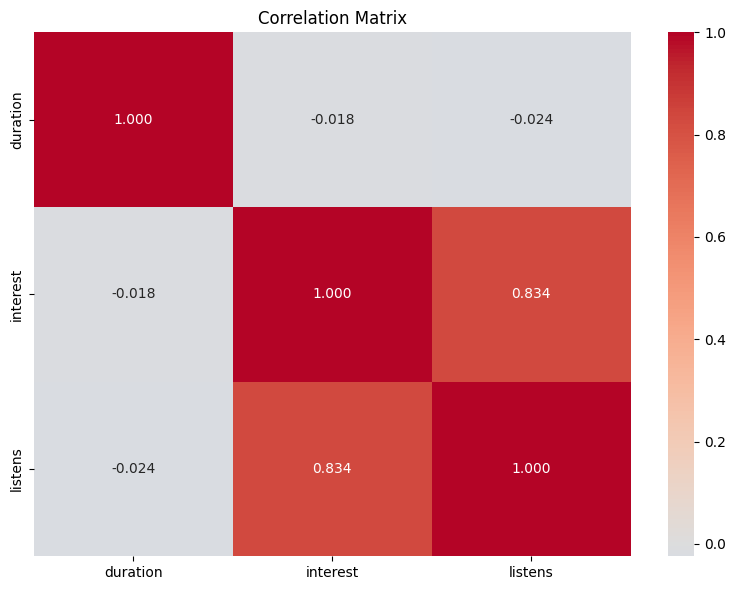

In [24]:
key_cols = ['duration', 'interest', 'listens']
available = [c for c in key_cols if c in df.columns]

if len(available) > 1:
    corr = df[available].corr()
    
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(corr, annot=True, fmt='.3f', cmap='coolwarm', center=0, ax=ax)
    ax.set_title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

# Data Cleaning Strategy

In [36]:
drop_threshold = 60
cols_to_drop = missing_df[missing_df['missing_pct'] > drop_threshold].index.tolist()
print(f'Columns to drop (>{drop_threshold}% missing):', len(cols_to_drop))
print(cols_to_drop)

Columns to drop (>60% missing): 9
['genre_parent_id', 'speechiness', 'valence', 'danceability', 'energy', 'tempo', 'liveness', 'instrumentalness', 'acousticness']


In [37]:
df_clean = df.drop(columns=cols_to_drop)
print('Shape after dropping columns:', df_clean.shape)

Shape after dropping columns: (99995, 38)


In [38]:
rows_before = len(df_clean)
df_clean = df_clean.dropna(subset=['genre_title'])
rows_after = len(df_clean)
print(f'Rows dropped (missing genre_title): {rows_before - rows_after}')
print(f'Remaining rows: {rows_after}')

Rows dropped (missing genre_title): 55362
Remaining rows: 44633


# Post-Cleaning Analysis

In [39]:
print('Dataset shape after cleaning:', df_clean.shape)
print('Missing values:', df_clean.isnull().sum().sum())
print('\nRemaining features:', df_clean.columns.tolist())

Dataset shape after cleaning: (44633, 38)
Missing values: 54091

Remaining features: ['track_id', 'album_title', 'album_tracks', 'artist_latitude', 'artist_longitude', 'artist_name', 'duration', 'favorites', 'genre_title', 'genres', 'genres_all', 'interest', 'listens', 'title', 'spectral_bandwidth_kurtosis_01', 'spectral_bandwidth_max_01', 'spectral_bandwidth_mean_01', 'spectral_bandwidth_median_01', 'spectral_bandwidth_min_01', 'spectral_bandwidth_skew_01', 'spectral_bandwidth_std_01', 'spectral_centroid_kurtosis_01', 'spectral_centroid_max_01', 'spectral_centroid_mean_01', 'spectral_centroid_median_01', 'spectral_centroid_min_01', 'spectral_centroid_skew_01', 'spectral_centroid_std_01', 'spectral_rolloff_kurtosis_01', 'spectral_rolloff_max_01', 'spectral_rolloff_mean_01', 'spectral_rolloff_median_01', 'spectral_rolloff_min_01', 'spectral_rolloff_skew_01', 'spectral_rolloff_std_01', 'genre_id', 'genre_color', 'genre_handle']


In [42]:
missing_clean = df_clean.isnull().sum()
missing_pct_clean = (missing_clean / len(df_clean)) * 100
missing_clean_df = pd.DataFrame({
    'missing_count': missing_clean,
    'missing_pct': missing_pct_clean
})
missing_clean_df = missing_clean_df[missing_clean_df['missing_count'] > 0].sort_values('missing_pct', ascending=False)

if len(missing_clean_df) > 0:
    print('Remaining missing data:')
    print(missing_clean_df)
else:
    print('No missing data after cleaning')

Remaining missing data:
                  missing_count  missing_pct
artist_latitude           26905    60.280510
artist_longitude          26905    60.280510
album_title                 280     0.627339
title                         1     0.002240


In [ ]:
if len(missing_clean_df) > 0:
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.barh(missing_clean_df.index, missing_clean_df['missing_pct'])
    ax.set_xlabel('Missing Percentage')
    ax.set_ylabel('Column')
    ax.set_title('Remaining Missing Values After Cleaning')
    plt.tight_layout()
    plt.show()
    
    fig, ax = plt.subplots(figsize=(14, 6))
    sns.heatmap(df_clean.isnull().iloc[:500], cbar=True, yticklabels=False, cmap='viridis', ax=ax)
    ax.set_title('Missing Data Pattern After Cleaning')
    ax.set_xlabel('Columns')
    ax.set_ylabel('Rows')
    plt.tight_layout()
    plt.show()

In [40]:
print('Genre distribution after cleaning:')
print(df_clean['genre_title'].value_counts())
print('\nGenre counts:', df_clean['genre_title'].nunique())

Genre distribution after cleaning:
genre_title
Rock                   12085
Experimental            9752
Electronic              8769
Hip-Hop                 3334
Folk                    2375
Pop                     2235
Instrumental            2003
International           1256
Classical               1129
Old-Time / Historic      491
Jazz                     484
Spoken                   323
Country                  163
Soul-RnB                 131
Blues                     79
Easy Listening            24
Name: count, dtype: int64

Genre counts: 16


In [41]:
missing_after = df_clean.isnull().sum()
missing_after = missing_after[missing_after > 0]
if len(missing_after) > 0:
    print('Columns still with missing values:')
    print(missing_after)
else:
    print('No missing values remaining')

Columns still with missing values:
album_title           280
artist_latitude     26905
artist_longitude    26905
title                   1
dtype: int64


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

df_clean['genre_title'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Genre Distribution After Cleaning')
axes[0].set_xlabel('Genre')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

if 'duration' in df_clean.columns:
    df_clean['duration'].hist(bins=50, ax=axes[1])
    axes[1].set_title('Duration Distribution After Cleaning')
    axes[1].set_xlabel('Duration (seconds)')
    axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [32]:
print('Missing values after cleaning:', df_clean.isnull().sum().sum())
print('Final shape:', df_clean.shape)

Missing values after cleaning: 0
Final shape: (44633, 38)


# Train Test Split

In [33]:
train_df, test_df = train_test_split(df_clean, test_size=0.2, random_state=42, stratify=df_clean['genre_title'])
print('Train shape:', train_df.shape)
print('Test shape:', test_df.shape)

Train shape: (35706, 38)
Test shape: (8927, 38)


In [34]:
train_df.to_csv('../DataBase/processed/train_data.csv', index=False)
test_df.to_csv('../DataBase/processed/test_data.csv', index=False)
print('Data saved')

Data saved


# Summary Statistics

In [35]:
print('Dataset Summary:')
print(f'Total samples: {len(df_clean)}')
print(f'Total features: {df_clean.shape[1]}')
print(f'Train samples: {len(train_df)}')
print(f'Test samples: {len(test_df)}')
print(f'Genres: {df_clean["genre_title"].nunique()}')
print(f'\nGenre distribution in train:')
print(train_df['genre_title'].value_counts())
print(f'\nGenre distribution in test:')
print(test_df['genre_title'].value_counts())

Dataset Summary:
Total samples: 44633
Total features: 38
Train samples: 35706
Test samples: 8927
Genres: 16

Genre distribution in train:
genre_title
Rock                   9668
Experimental           7802
Electronic             7015
Hip-Hop                2667
Folk                   1900
Pop                    1788
Instrumental           1602
International          1005
Classical               903
Old-Time / Historic     393
Jazz                    387
Spoken                  258
Country                 131
Soul-RnB                105
Blues                    63
Easy Listening           19
Name: count, dtype: int64

Genre distribution in test:
genre_title
Rock                   2417
Experimental           1950
Electronic             1754
Hip-Hop                 667
Folk                    475
Pop                     447
Instrumental            401
International           251
Classical               226
Old-Time / Historic      98
Jazz                     97
Spoken                   65